In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import scipy as sp
from scipy import sparse, io
import glob 
import re

/home/sennis/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Data was downloaded from [the zenodo link](https://zenodo.org/record/3345981#.YB1E3nX7Srf) in the paper (`expression_matrices.tar`). There's count matrices for 4 normal donors but no metadata. There's also seurat objects for the 5 AML patient samples but will work the raw count matrices for these samples too so they're in the same format. Have to assume this data hasn't been QC-ed.

Will start with just the healthy donors.

In [2]:
adatas = []
adata = sc.read('../data/petti/ND_083017.matrix.mtx.gz').T
adata.obs_names = pd.read_csv('../data/petti/ND_083017.barcodes.tsv.gz', delimiter='\t', header=None)[0].values
adata.var_names = pd.read_csv('../data/petti/ND_083017.genes.tsv.gz', delimiter='\t', header=None)[1]
adata

Only considering the two last: ['.mtx', '.gz'].
Only considering the two last: ['.mtx', '.gz'].


AnnData object with n_obs × n_vars = 5860 × 33538

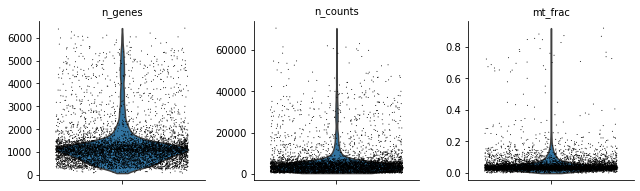

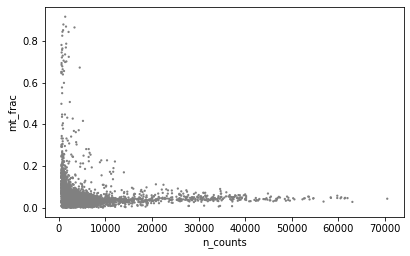

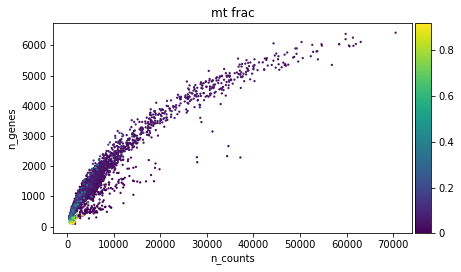

In [5]:
# Quality control - calculate QC covariates
adata.obs['n_counts'] = adata.X.sum(1)
adata.obs['log_counts'] = np.log(adata.obs['n_counts'])
adata.obs['n_genes'] = (adata.X > 0).sum(1)

adata.X = adata.X.toarray()
mt_gene_mask = [gene.startswith('MT-') for gene in adata.var_names]
adata.obs['mt_frac'] = adata.X[:, mt_gene_mask].sum(1)/adata.obs['n_counts']

# Quality control - plot QC metrics
sc.pl.violin(adata, ['n_genes', 'n_counts', 'mt_frac'],
             jitter=0.4, multi_panel=True)

sc.pl.scatter(adata, x='n_counts', y='mt_frac')
sc.pl.scatter(adata, x='n_counts', y='n_genes', color='mt_frac')

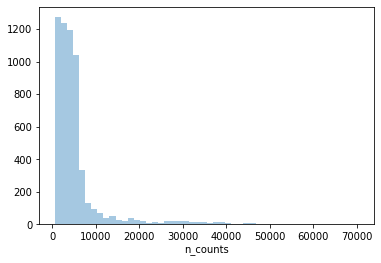

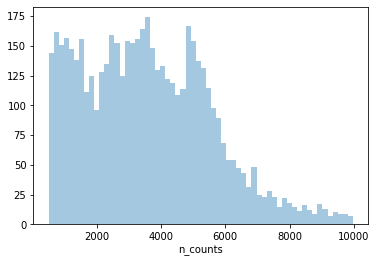

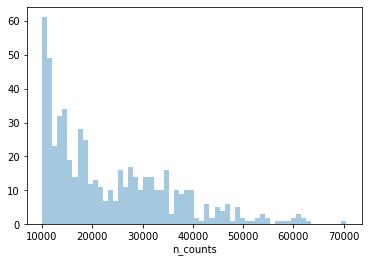

In [6]:
#Thresholding decision: counts
p3 = sb.distplot(adata.obs['n_counts'], kde=False)
plt.show()

p4 = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']<10000], kde=False, bins=60)
plt.show()

p5 = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']>10000], kde=False, bins=60)
plt.show()

In [7]:
# Filter cells according to identified QC thresholds:
print('Total number of cells: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, max_counts = 60000)
print('Number of cells after max count filter: {:d}'.format(adata.n_obs))

adata = adata[adata.obs['mt_frac'] < 0.6]
print('Number of cells after MT filter: {:d}'.format(adata.n_obs))

Total number of cells: 5860


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Number of cells after max count filter: 5853
Number of cells after MT filter: 5822


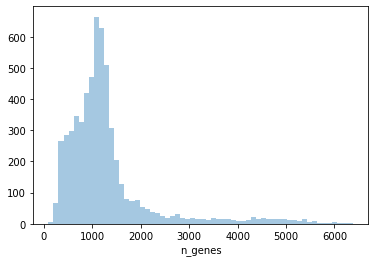

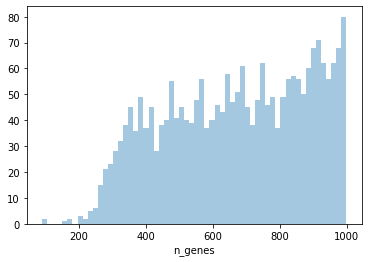

In [8]:
#Thresholding decision: genes
p6 = sb.distplot(adata.obs['n_genes'], kde=False, bins=60)
plt.show()

p7 = sb.distplot(adata.obs['n_genes'][adata.obs['n_genes'] < 1000], kde=False, bins=60)
plt.show()

In [9]:
# Filter cells according to identified QC thresholds:
print('Total number of cells: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, min_genes = 400)
print('Number of cells after min genes filter: {:d}'.format(adata.n_obs))

Total number of cells: 5822


Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Number of cells after min genes filter: 5497


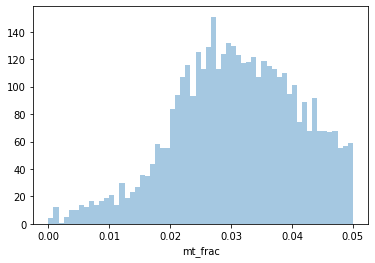

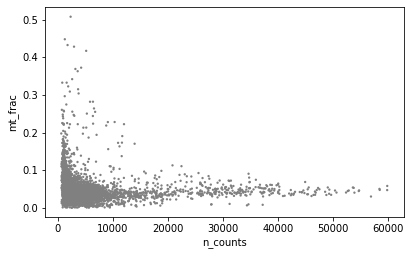

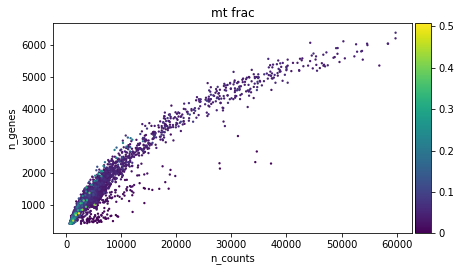

In [10]:
sb.distplot(adata.obs['mt_frac'][adata.obs['mt_frac'] < 0.05], kde=False, bins=60)
plt.show()
sc.pl.scatter(adata, x='n_counts', y='mt_frac')
sc.pl.scatter(adata, x='n_counts', y='n_genes', color='mt_frac')

In [11]:
# Thresholding on number of counts and percent_mito
print('Total number of cells: {:d}'.format(adata.n_obs))
adata = adata[(adata.obs['mt_frac'] > 0.01) | (adata.obs['n_counts'] > 7500)]

print('Number of cells after filter: {:d}'.format(adata.n_obs))

Total number of cells: 5497
Number of cells after filter: 5395


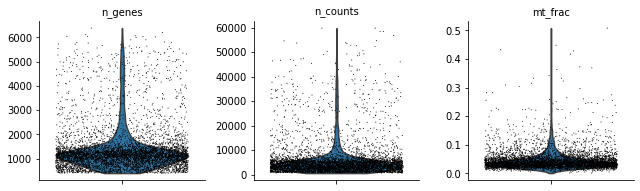

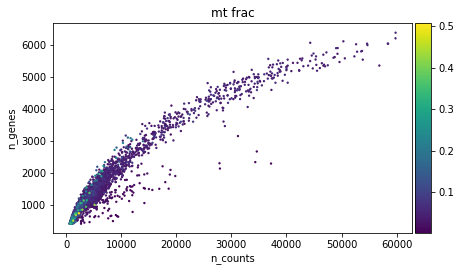

In [12]:
# visualise QC metrics after filtering
sc.pl.violin(adata, ['n_genes', 'n_counts', 'mt_frac'], jitter=0.4, multi_panel=True)
sc.pl.scatter(adata, x='n_counts', y='n_genes', color='mt_frac')

In [13]:
adata.obs['sample'] = 'ND_083017'
adata.var_names_make_unique()
adatas.append(adata)

Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [14]:
adata = sc.read('../data/petti/ND_090617.matrix.mtx.gz').T
adata.obs_names = pd.read_csv('../data/petti/ND_090617.barcodes.tsv.gz', delimiter='\t', header=None)[0].values
adata.var_names = pd.read_csv('../data/petti/ND_090617.genes.tsv.gz', delimiter='\t', header=None)[1]
adata

Only considering the two last: ['.mtx', '.gz'].
Only considering the two last: ['.mtx', '.gz'].


AnnData object with n_obs × n_vars = 7197 × 33538

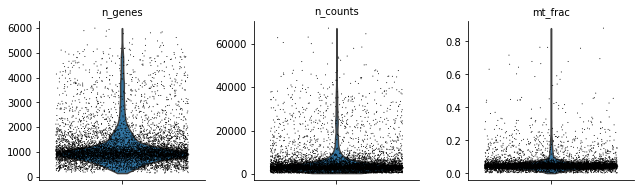

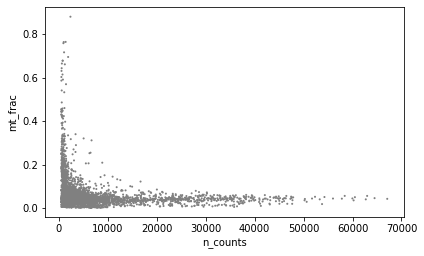

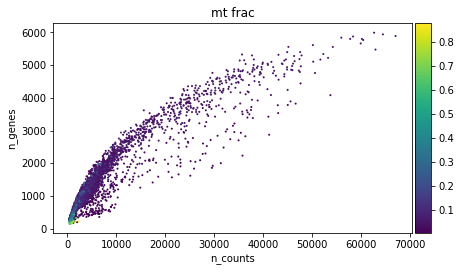

In [16]:
# Quality control - calculate QC covariates
adata.obs['n_counts'] = adata.X.sum(1)
adata.obs['log_counts'] = np.log(adata.obs['n_counts'])
adata.obs['n_genes'] = (adata.X > 0).sum(1)

adata.X = adata.X.toarray()
mt_gene_mask = [gene.startswith('MT-') for gene in adata.var_names]
adata.obs['mt_frac'] = adata.X[:, mt_gene_mask].sum(1)/adata.obs['n_counts']

# Quality control - plot QC metrics
sc.pl.violin(adata, ['n_genes', 'n_counts', 'mt_frac'],
             jitter=0.4, multi_panel=True)

sc.pl.scatter(adata, x='n_counts', y='mt_frac')
sc.pl.scatter(adata, x='n_counts', y='n_genes', color='mt_frac')

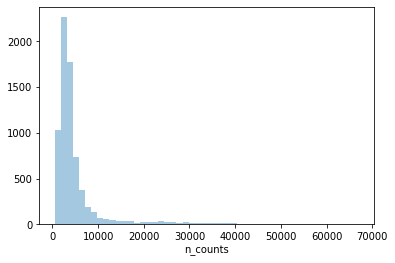

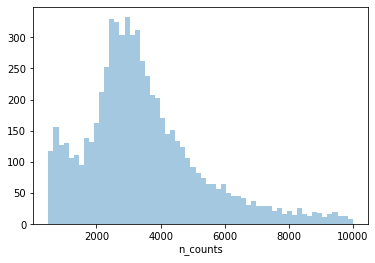

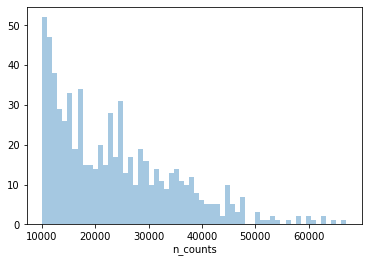

In [17]:
#Thresholding decision: counts
p3 = sb.distplot(adata.obs['n_counts'], kde=False)
plt.show()

p4 = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']<10000], kde=False, bins=60)
plt.show()

p5 = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']>10000], kde=False, bins=60)
plt.show()

In [18]:
# Filter cells according to identified QC thresholds:
print('Total number of cells: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, max_counts = 60000)
print('Number of cells after max count filter: {:d}'.format(adata.n_obs))

adata = adata[adata.obs['mt_frac'] < 0.5]
print('Number of cells after MT filter: {:d}'.format(adata.n_obs))

Total number of cells: 7197


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Number of cells after max count filter: 7191
Number of cells after MT filter: 7172


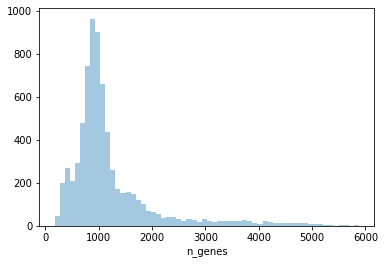

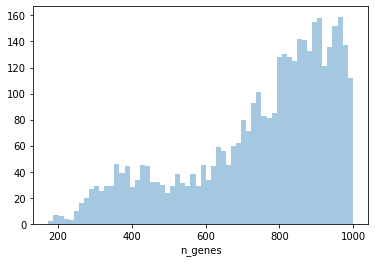

In [19]:
#Thresholding decision: genes
p6 = sb.distplot(adata.obs['n_genes'], kde=False, bins=60)
plt.show()

p7 = sb.distplot(adata.obs['n_genes'][adata.obs['n_genes'] < 1000], kde=False, bins=60)
plt.show()

In [20]:
# Filter cells according to identified QC thresholds:
print('Total number of cells: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, min_genes = 400)
print('Number of cells after min genes filter: {:d}'.format(adata.n_obs))

Total number of cells: 7172


Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Number of cells after min genes filter: 6825


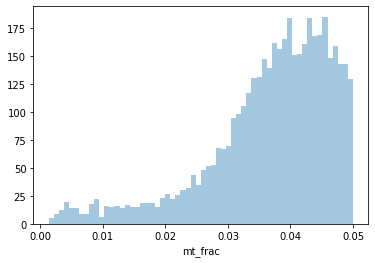

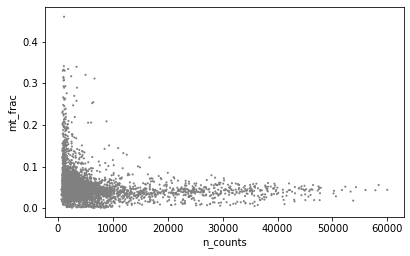

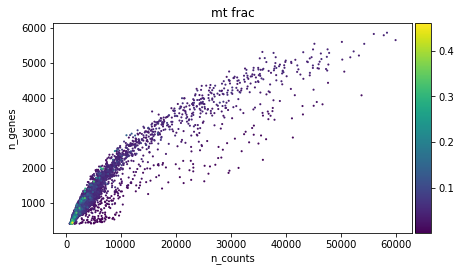

In [21]:
sb.distplot(adata.obs['mt_frac'][adata.obs['mt_frac'] < 0.05], kde=False, bins=60)
plt.show()
sc.pl.scatter(adata, x='n_counts', y='mt_frac')
sc.pl.scatter(adata, x='n_counts', y='n_genes', color='mt_frac')

In [22]:
# Thresholding on number of counts and percent_mito
print('Total number of cells: {:d}'.format(adata.n_obs))
adata = adata[(adata.obs['mt_frac'] > 0.01) | (adata.obs['n_counts'] > 10000)]

print('Number of cells after filter: {:d}'.format(adata.n_obs))

Total number of cells: 6825
Number of cells after filter: 6704


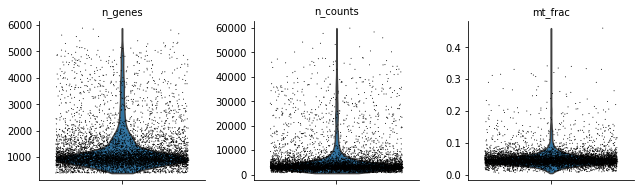

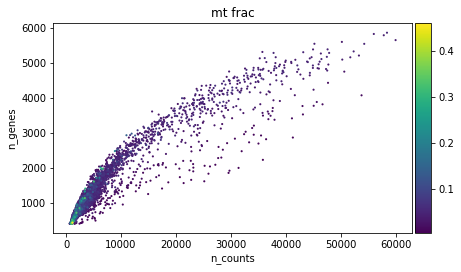

In [23]:
# visualise QC metrics after filtering
sc.pl.violin(adata, ['n_genes', 'n_counts', 'mt_frac'], jitter=0.4, multi_panel=True)
sc.pl.scatter(adata, x='n_counts', y='n_genes', color='mt_frac')

In [24]:
adata.obs['sample'] = 'ND_090617'
adata.var_names_make_unique()
adatas.append(adata)

Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [25]:
adata = sc.read('../data/petti/Normal_sorted_170531.matrix.mtx.gz').T
adata.obs_names = pd.read_csv('../data/petti/Normal_sorted_170531.barcodes.tsv.gz', delimiter='\t', header=None)[0].values
adata.var_names = pd.read_csv('../data/petti/Normal_sorted_170531.genes.tsv.gz', delimiter='\t', header=None)[1]
adata

Only considering the two last: ['.mtx', '.gz'].
Only considering the two last: ['.mtx', '.gz'].


AnnData object with n_obs × n_vars = 3137 × 33538

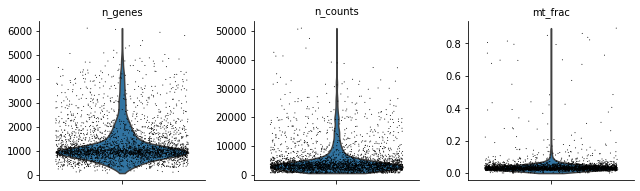

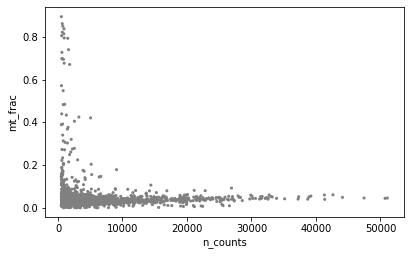

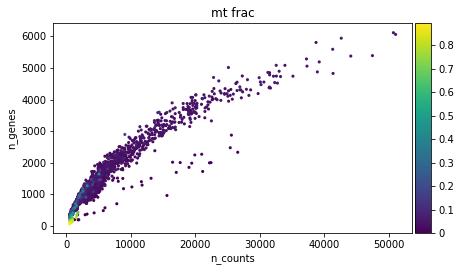

In [26]:
# Quality control - calculate QC covariates
adata.obs['n_counts'] = adata.X.sum(1)
adata.obs['log_counts'] = np.log(adata.obs['n_counts'])
adata.obs['n_genes'] = (adata.X > 0).sum(1)

adata.X = adata.X.toarray()
mt_gene_mask = [gene.startswith('MT-') for gene in adata.var_names]
adata.obs['mt_frac'] = adata.X[:, mt_gene_mask].sum(1)/adata.obs['n_counts']

# Quality control - plot QC metrics
sc.pl.violin(adata, ['n_genes', 'n_counts', 'mt_frac'],
             jitter=0.4, multi_panel=True)

sc.pl.scatter(adata, x='n_counts', y='mt_frac')
sc.pl.scatter(adata, x='n_counts', y='n_genes', color='mt_frac')

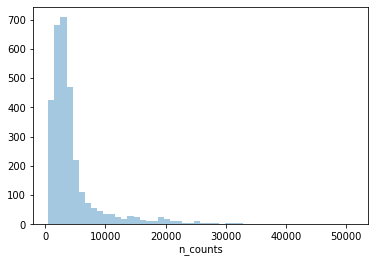

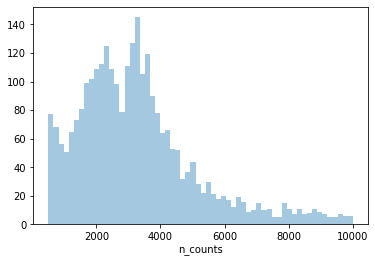

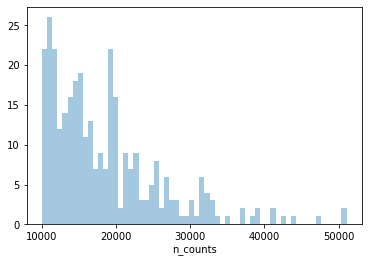

In [27]:
#Thresholding decision: counts
p3 = sb.distplot(adata.obs['n_counts'], kde=False)
plt.show()

p4 = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']<10000], kde=False, bins=60)
plt.show()

p5 = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']>10000], kde=False, bins=60)
plt.show()

In [28]:
# Filter cells according to identified QC thresholds:
print('Total number of cells: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, max_counts = 40000)
print('Number of cells after max count filter: {:d}'.format(adata.n_obs))

adata = adata[adata.obs['mt_frac'] < 0.5]
print('Number of cells after MT filter: {:d}'.format(adata.n_obs))

Total number of cells: 3137


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Number of cells after max count filter: 3130
Number of cells after MT filter: 3112


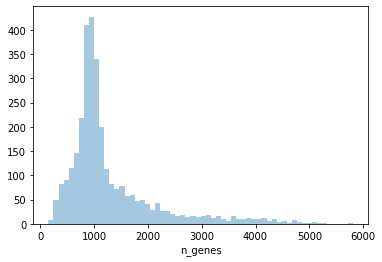

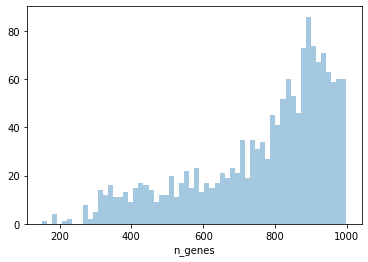

In [29]:
#Thresholding decision: genes
p6 = sb.distplot(adata.obs['n_genes'], kde=False, bins=60)
plt.show()

p7 = sb.distplot(adata.obs['n_genes'][adata.obs['n_genes'] < 1000], kde=False, bins=60)
plt.show()

In [30]:
# Filter cells according to identified QC thresholds:
print('Total number of cells: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, min_genes = 400)
print('Number of cells after min genes filter: {:d}'.format(adata.n_obs))

Total number of cells: 3112


Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Number of cells after min genes filter: 3008


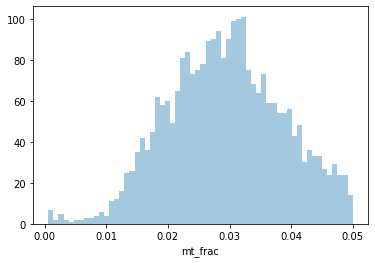

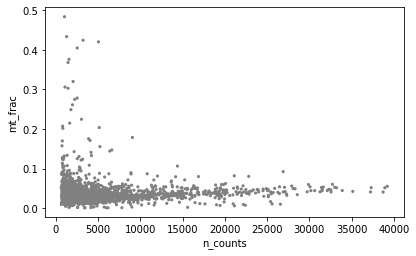

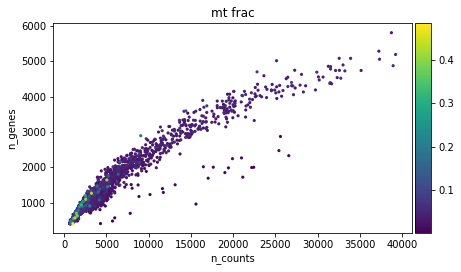

In [31]:
sb.distplot(adata.obs['mt_frac'][adata.obs['mt_frac'] < 0.05], kde=False, bins=60)
plt.show()
sc.pl.scatter(adata, x='n_counts', y='mt_frac')
sc.pl.scatter(adata, x='n_counts', y='n_genes', color='mt_frac')

In [32]:
# Thresholding on number of counts and percent_mito
print('Total number of cells: {:d}'.format(adata.n_obs))
adata = adata[(adata.obs['mt_frac'] > 0.01) | (adata.obs['n_counts'] > 7500)]

print('Number of cells after filter: {:d}'.format(adata.n_obs))

Total number of cells: 3008
Number of cells after filter: 2982


In [33]:
adata.obs['sample'] = 'Normal_sorted_170531'
adata.var_names_make_unique()
adatas.append(adata)

Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [34]:
adata = sc.read('../data/petti/Normal_sorted_170607.matrix.mtx.gz').T
adata.obs_names = pd.read_csv('../data/petti/Normal_sorted_170607.barcodes.tsv.gz', delimiter='\t', header=None)[0].values
adata.var_names = pd.read_csv('../data/petti/Normal_sorted_170607.genes.tsv.gz', delimiter='\t', header=None)[1]
adata

Only considering the two last: ['.mtx', '.gz'].
Only considering the two last: ['.mtx', '.gz'].


AnnData object with n_obs × n_vars = 3605 × 33538

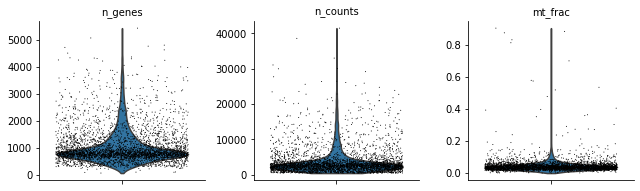

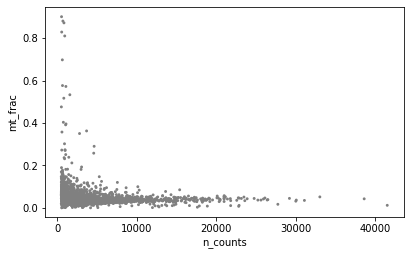

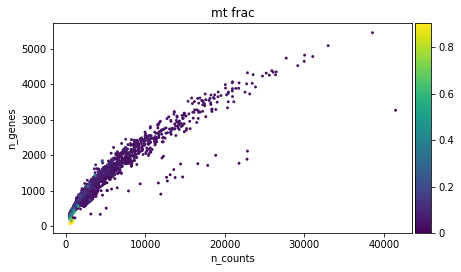

In [35]:
# Quality control - calculate QC covariates
adata.obs['n_counts'] = adata.X.sum(1)
adata.obs['log_counts'] = np.log(adata.obs['n_counts'])
adata.obs['n_genes'] = (adata.X > 0).sum(1)

adata.X = adata.X.toarray()
mt_gene_mask = [gene.startswith('MT-') for gene in adata.var_names]
adata.obs['mt_frac'] = adata.X[:, mt_gene_mask].sum(1)/adata.obs['n_counts']

# Quality control - plot QC metrics
sc.pl.violin(adata, ['n_genes', 'n_counts', 'mt_frac'],
             jitter=0.4, multi_panel=True)

sc.pl.scatter(adata, x='n_counts', y='mt_frac')
sc.pl.scatter(adata, x='n_counts', y='n_genes', color='mt_frac')

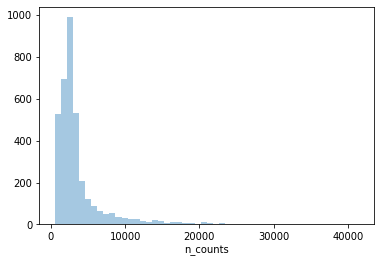

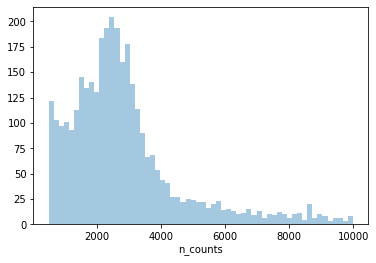

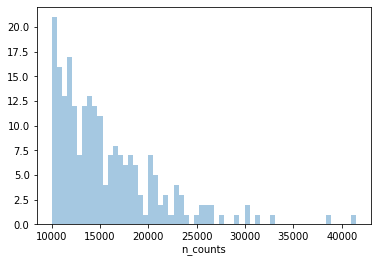

In [36]:
#Thresholding decision: counts
p3 = sb.distplot(adata.obs['n_counts'], kde=False)
plt.show()

p4 = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']<10000], kde=False, bins=60)
plt.show()

p5 = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']>10000], kde=False, bins=60)
plt.show()

In [37]:
# Filter cells according to identified QC thresholds:
print('Total number of cells: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, max_counts = 40000)
print('Number of cells after max count filter: {:d}'.format(adata.n_obs))

adata = adata[adata.obs['mt_frac'] < 0.5]
print('Number of cells after MT filter: {:d}'.format(adata.n_obs))

Total number of cells: 3605


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Number of cells after max count filter: 3604
Number of cells after MT filter: 3594


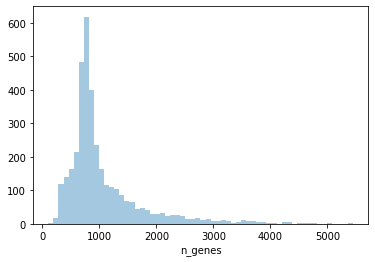

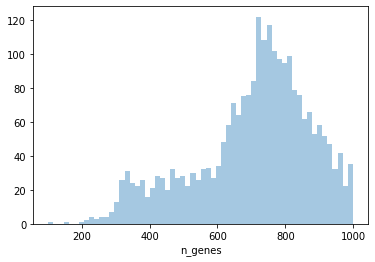

In [38]:
#Thresholding decision: genes
p6 = sb.distplot(adata.obs['n_genes'], kde=False, bins=60)
plt.show()

p7 = sb.distplot(adata.obs['n_genes'][adata.obs['n_genes'] < 1000], kde=False, bins=60)
plt.show()

In [39]:
# Filter cells according to identified QC thresholds:
print('Total number of cells: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, min_genes = 400)
print('Number of cells after min genes filter: {:d}'.format(adata.n_obs))

Total number of cells: 3594


Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Number of cells after min genes filter: 3410


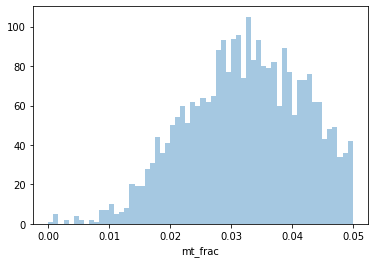

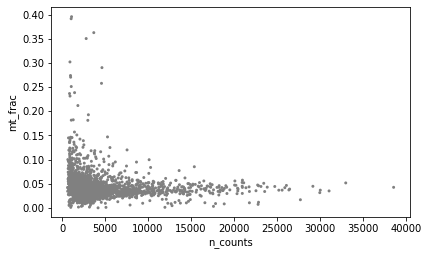

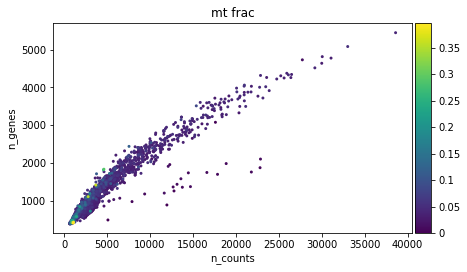

In [40]:
sb.distplot(adata.obs['mt_frac'][adata.obs['mt_frac'] < 0.05], kde=False, bins=60)
plt.show()
sc.pl.scatter(adata, x='n_counts', y='mt_frac')
sc.pl.scatter(adata, x='n_counts', y='n_genes', color='mt_frac')

In [41]:
# Thresholding on number of counts and percent_mito
print('Total number of cells: {:d}'.format(adata.n_obs))
adata = adata[(adata.obs['mt_frac'] > 0.01) | (adata.obs['n_counts'] > 7500)]

print('Number of cells after filter: {:d}'.format(adata.n_obs))

Total number of cells: 3410
Number of cells after filter: 3390


In [42]:
adata.obs['sample'] = 'Normal_sorted_170607'
adata.var_names_make_unique()
adatas.append(adata)

Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [43]:
# merge all samples
adata_merge = adatas[0].concatenate(adatas[1:], batch_key='sample_ID')
adata_merge

AnnData object with n_obs × n_vars = 18471 × 33538
    obs: 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'sample', 'sample_ID'

In [44]:
adata_merge.X = sparse.csr_matrix(adata_merge.X).astype(dtype='float32')
adata_merge.layers['counts'] = adata_merge.X
sc.pp.normalize_per_cell(adata_merge, counts_per_cell_after=1e4)
sc.pp.log1p(adata_merge)
adata_merge

AnnData object with n_obs × n_vars = 18471 × 33538
    obs: 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'sample', 'sample_ID'
    uns: 'log1p'
    layers: 'counts'

In [45]:
adata_merge.write('../data/petti/petti_healthy.h5ad')

... storing 'sample' as categorical


----------------------
I used `../rscripts/singleR.R` to predict cell types. Going to see how they look.

In [2]:
adata = sc.read('../data/petti/petti_healthy.h5ad')
labs = pd.read_csv('../data/petti/petti_healthy_cell_labels.csv', sep = '\t')
adata.obs['celltype'] = labs['label']

/home/sennis/anaconda3/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../home/sennis/anaconda3/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  self.func_ir.loc))
/home/sennis/anaconda3/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../home/sennis/anaconda3/lib/python3.

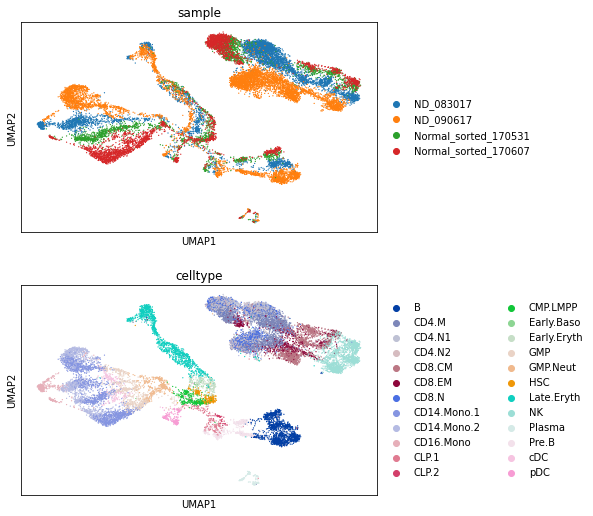

In [3]:
sc.pp.highly_variable_genes(adata, n_top_genes=4000)
sc.pp.pca(adata, n_comps=50, use_highly_variable=True, svd_solver='arpack')
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['sample', 'celltype'], ncols=1)

In [4]:
adata.obs['celltype'].value_counts()

CD4.M          2397
CD14.Mono.1    1824
CD4.N1         1543
NK             1522
B              1447
CD8.CM         1391
CD14.Mono.2    1267
CD8.N          1228
Late.Eryth     1178
CD8.EM          739
GMP             726
CD4.N2          521
Pre.B           439
GMP.Neut        367
CD16.Mono       311
CMP.LMPP        280
HSC             258
Early.Eryth     241
cDC             211
pDC             197
CLP.1           186
Plasma          125
CLP.2            46
Early.Baso       27
Name: celltype, dtype: int64

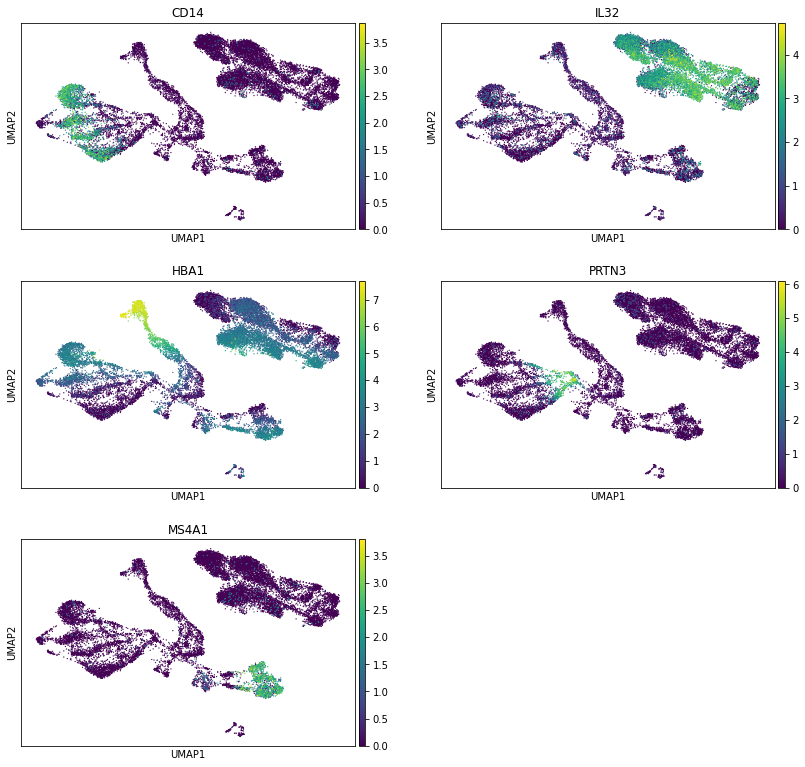

In [5]:
# make sure cells are expressing the genes you'd expect
sc.pl.umap(adata, color=['CD14', 'IL32', 'HBA1', 'PRTN3', 'MS4A1'], ncols=2)

In [6]:
# save file with cell type labels
adata.write('../data/petti/petti_healthy.h5ad')

Now move on to the AML samples.

In [2]:
adatas = []
adata = sc.read('../data/petti/508084.matrix.mtx.gz').T
adata.obs_names = pd.read_csv('../data/petti/508084.barcodes.tsv.gz', delimiter='\t', header=None)[0].values
adata.var_names = pd.read_csv('../data/petti/508084.genes.tsv.gz', delimiter='\t', header=None)[1]
adata

Only considering the two last: ['.mtx', '.gz'].
Only considering the two last: ['.mtx', '.gz'].


AnnData object with n_obs × n_vars = 14964 × 33694

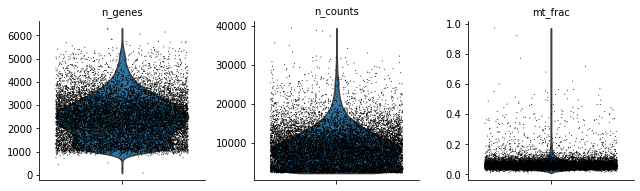

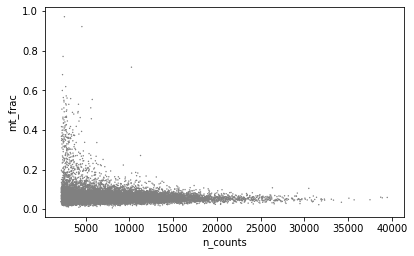

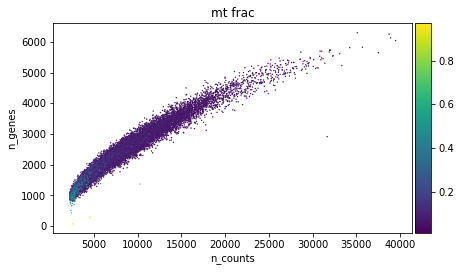

In [3]:
# Quality control - calculate QC covariates
adata.obs['n_counts'] = adata.X.sum(1)
adata.obs['log_counts'] = np.log(adata.obs['n_counts'])
adata.obs['n_genes'] = (adata.X > 0).sum(1)

adata.X = adata.X.toarray()
mt_gene_mask = [gene.startswith('MT-') for gene in adata.var_names]
adata.obs['mt_frac'] = adata.X[:, mt_gene_mask].sum(1)/adata.obs['n_counts']

# Quality control - plot QC metrics
sc.pl.violin(adata, ['n_genes', 'n_counts', 'mt_frac'],
             jitter=0.4, multi_panel=True)

sc.pl.scatter(adata, x='n_counts', y='mt_frac')
sc.pl.scatter(adata, x='n_counts', y='n_genes', color='mt_frac')

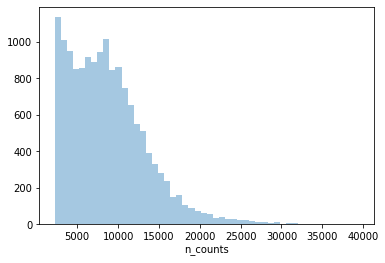

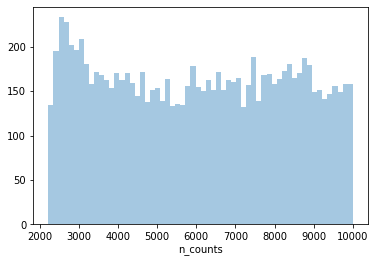

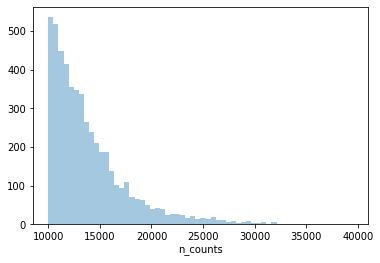

In [4]:
#Thresholding decision: counts
p3 = sb.distplot(adata.obs['n_counts'], kde=False)
plt.show()

p4 = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']<10000], kde=False, bins=60)
plt.show()

p5 = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']>10000], kde=False, bins=60)
plt.show()

In [5]:
# Filter cells according to identified QC thresholds:
print('Total number of cells: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, max_counts = 37000)
print('Number of cells after max count filter: {:d}'.format(adata.n_obs))

adata = adata[adata.obs['mt_frac'] < 0.5]
print('Number of cells after MT filter: {:d}'.format(adata.n_obs))

Total number of cells: 14964


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Number of cells after max count filter: 14960
Number of cells after MT filter: 14938


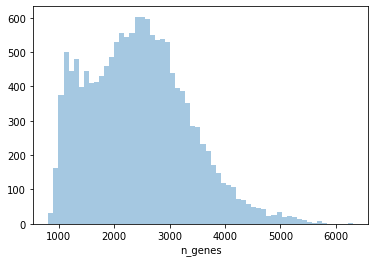

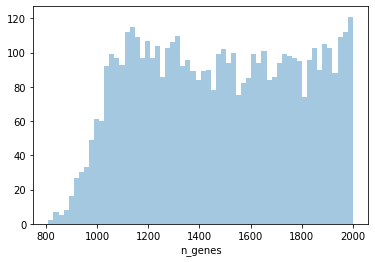

In [7]:
#Thresholding decision: genes
p6 = sb.distplot(adata.obs['n_genes'], kde=False, bins=60)
plt.show()

p7 = sb.distplot(adata.obs['n_genes'][adata.obs['n_genes'] < 2000], kde=False, bins=60)
plt.show()

In [8]:
# Filter cells according to identified QC thresholds:
print('Total number of cells: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, min_genes = 400)
print('Number of cells after min genes filter: {:d}'.format(adata.n_obs))

Total number of cells: 14938


Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Number of cells after min genes filter: 14938


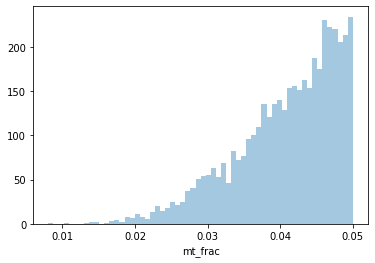

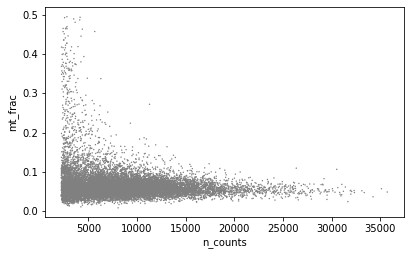

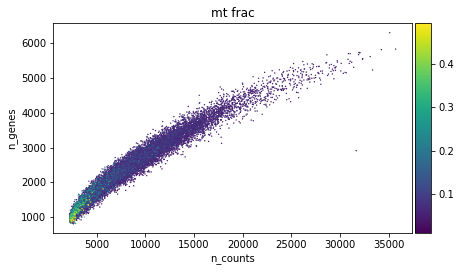

In [9]:
sb.distplot(adata.obs['mt_frac'][adata.obs['mt_frac'] < 0.05], kde=False, bins=60)
plt.show()
sc.pl.scatter(adata, x='n_counts', y='mt_frac')
sc.pl.scatter(adata, x='n_counts', y='n_genes', color='mt_frac')

In [10]:
# Thresholding on number of counts and percent_mito
print('Total number of cells: {:d}'.format(adata.n_obs))
adata = adata[(adata.obs['mt_frac'] > 0.01) | (adata.obs['n_counts'] > 7500)]

print('Number of cells after filter: {:d}'.format(adata.n_obs))

Total number of cells: 14938
Number of cells after filter: 14938


In [11]:
adata.obs['sample'] = '508084'
adata.var_names_make_unique()
adatas.append(adata)

Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [12]:
adata = sc.read('../data/petti/548327.matrix.mtx.gz').T
adata.obs_names = pd.read_csv('../data/petti/548327.barcodes.tsv.gz', delimiter='\t', header=None)[0].values
adata.var_names = pd.read_csv('../data/petti/548327.genes.tsv.gz', delimiter='\t', header=None)[1]
adata

Only considering the two last: ['.mtx', '.gz'].
Only considering the two last: ['.mtx', '.gz'].


AnnData object with n_obs × n_vars = 11620 × 33694

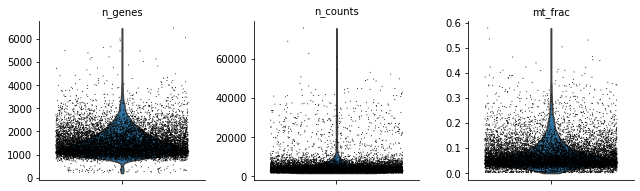

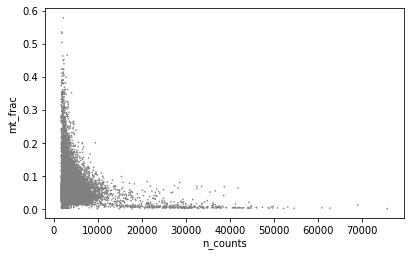

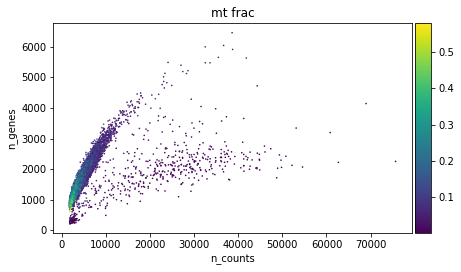

In [13]:
# Quality control - calculate QC covariates
adata.obs['n_counts'] = adata.X.sum(1)
adata.obs['log_counts'] = np.log(adata.obs['n_counts'])
adata.obs['n_genes'] = (adata.X > 0).sum(1)

adata.X = adata.X.toarray()
mt_gene_mask = [gene.startswith('MT-') for gene in adata.var_names]
adata.obs['mt_frac'] = adata.X[:, mt_gene_mask].sum(1)/adata.obs['n_counts']

# Quality control - plot QC metrics
sc.pl.violin(adata, ['n_genes', 'n_counts', 'mt_frac'],
             jitter=0.4, multi_panel=True)

sc.pl.scatter(adata, x='n_counts', y='mt_frac')
sc.pl.scatter(adata, x='n_counts', y='n_genes', color='mt_frac')

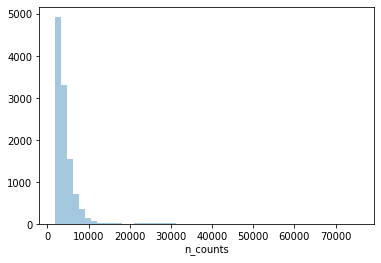

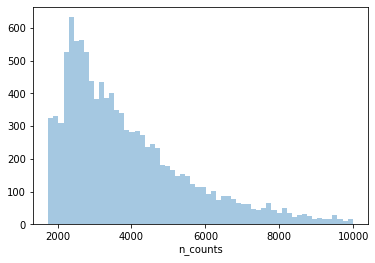

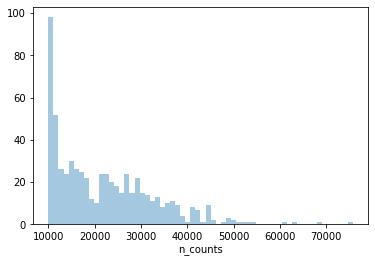

In [14]:
#Thresholding decision: counts
p3 = sb.distplot(adata.obs['n_counts'], kde=False)
plt.show()

p4 = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']<10000], kde=False, bins=60)
plt.show()

p5 = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']>10000], kde=False, bins=60)
plt.show()

In [15]:
# Filter cells according to identified QC thresholds:
print('Total number of cells: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, max_counts = 40000)
print('Number of cells after max count filter: {:d}'.format(adata.n_obs))

adata = adata[adata.obs['mt_frac'] < 0.4]
print('Number of cells after MT filter: {:d}'.format(adata.n_obs))

Total number of cells: 11620


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Number of cells after max count filter: 11578
Number of cells after MT filter: 11559


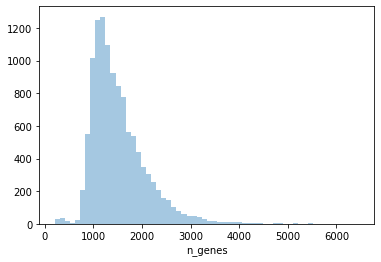

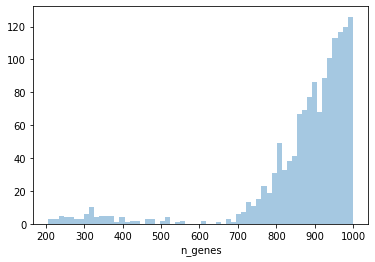

In [16]:
#Thresholding decision: genes
p6 = sb.distplot(adata.obs['n_genes'], kde=False, bins=60)
plt.show()

p7 = sb.distplot(adata.obs['n_genes'][adata.obs['n_genes'] < 1000], kde=False, bins=60)
plt.show()

In [17]:
# Filter cells according to identified QC thresholds:
print('Total number of cells: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, min_genes = 600)
print('Number of cells after min genes filter: {:d}'.format(adata.n_obs))

Total number of cells: 11559


Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Number of cells after min genes filter: 11474


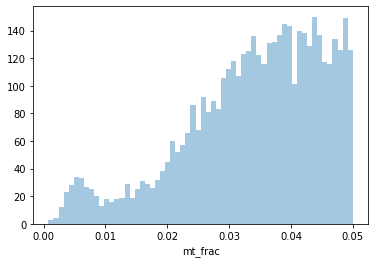

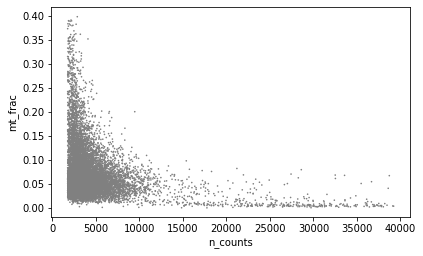

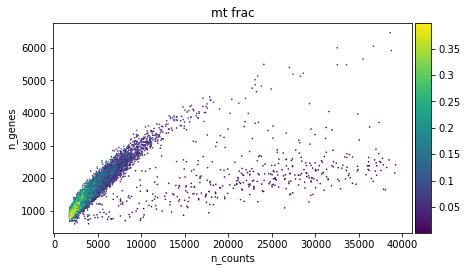

In [18]:
sb.distplot(adata.obs['mt_frac'][adata.obs['mt_frac'] < 0.05], kde=False, bins=60)
plt.show()
sc.pl.scatter(adata, x='n_counts', y='mt_frac')
sc.pl.scatter(adata, x='n_counts', y='n_genes', color='mt_frac')

In [19]:
# Thresholding on number of counts and percent_mito
print('Total number of cells: {:d}'.format(adata.n_obs))
adata = adata[(adata.obs['mt_frac'] > 0.01) | (adata.obs['n_counts'] > 40000)]

print('Number of cells after filter: {:d}'.format(adata.n_obs))

Total number of cells: 11474
Number of cells after filter: 11247


In [20]:
adata.obs['sample'] = '548327'
adata.var_names_make_unique()
adatas.append(adata)

Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [21]:
adata = sc.read('../data/petti/721214.matrix.mtx.gz').T
adata.obs_names = pd.read_csv('../data/petti/721214.barcodes.tsv.gz', delimiter='\t', header=None)[0].values
adata.var_names = pd.read_csv('../data/petti/721214.genes.tsv.gz', delimiter='\t', header=None)[1]
adata

Only considering the two last: ['.mtx', '.gz'].
Only considering the two last: ['.mtx', '.gz'].


AnnData object with n_obs × n_vars = 20474 × 33694

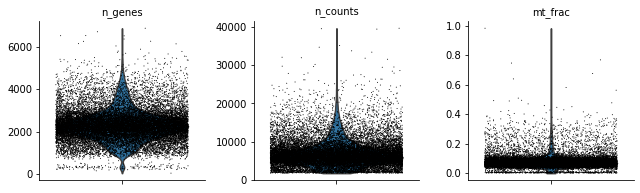

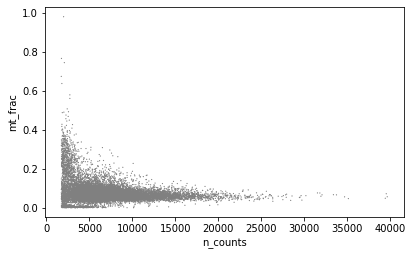

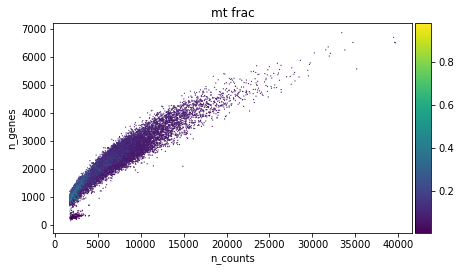

In [22]:
# Quality control - calculate QC covariates
adata.obs['n_counts'] = adata.X.sum(1)
adata.obs['log_counts'] = np.log(adata.obs['n_counts'])
adata.obs['n_genes'] = (adata.X > 0).sum(1)

adata.X = adata.X.toarray()
mt_gene_mask = [gene.startswith('MT-') for gene in adata.var_names]
adata.obs['mt_frac'] = adata.X[:, mt_gene_mask].sum(1)/adata.obs['n_counts']

# Quality control - plot QC metrics
sc.pl.violin(adata, ['n_genes', 'n_counts', 'mt_frac'],
             jitter=0.4, multi_panel=True)

sc.pl.scatter(adata, x='n_counts', y='mt_frac')
sc.pl.scatter(adata, x='n_counts', y='n_genes', color='mt_frac')

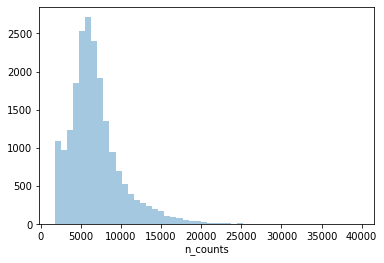

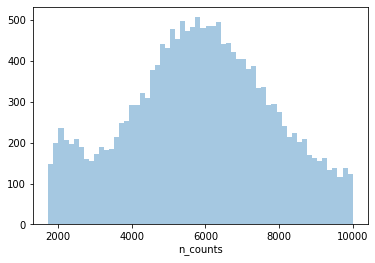

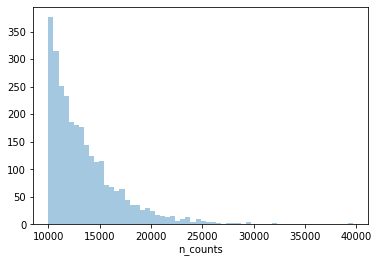

In [23]:
#Thresholding decision: counts
p3 = sb.distplot(adata.obs['n_counts'], kde=False)
plt.show()

p4 = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']<10000], kde=False, bins=60)
plt.show()

p5 = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']>10000], kde=False, bins=60)
plt.show()

In [24]:
# Filter cells according to identified QC thresholds:
print('Total number of cells: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, max_counts = 30000)
print('Number of cells after max count filter: {:d}'.format(adata.n_obs))

adata = adata[adata.obs['mt_frac'] < 0.5]
print('Number of cells after MT filter: {:d}'.format(adata.n_obs))

Total number of cells: 20474


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Number of cells after max count filter: 20462
Number of cells after MT filter: 20454


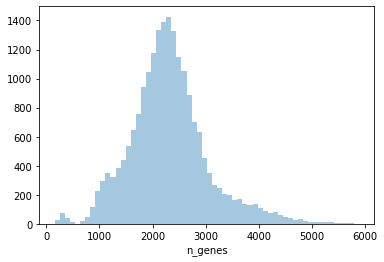

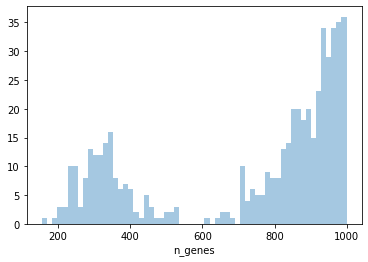

In [25]:
#Thresholding decision: genes
p6 = sb.distplot(adata.obs['n_genes'], kde=False, bins=60)
plt.show()

p7 = sb.distplot(adata.obs['n_genes'][adata.obs['n_genes'] < 1000], kde=False, bins=60)
plt.show()

In [26]:
# Filter cells according to identified QC thresholds:
print('Total number of cells: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, min_genes = 600)
print('Number of cells after min genes filter: {:d}'.format(adata.n_obs))

Total number of cells: 20454


Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Number of cells after min genes filter: 20301


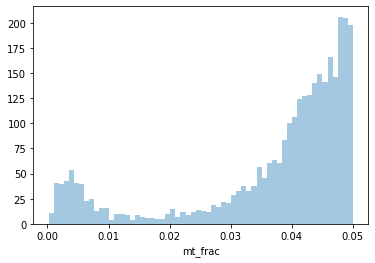

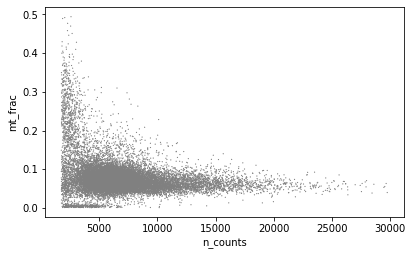

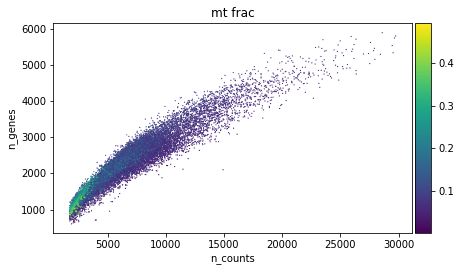

In [27]:
sb.distplot(adata.obs['mt_frac'][adata.obs['mt_frac'] < 0.05], kde=False, bins=60)
plt.show()
sc.pl.scatter(adata, x='n_counts', y='mt_frac')
sc.pl.scatter(adata, x='n_counts', y='n_genes', color='mt_frac')

In [28]:
# Thresholding on number of counts and percent_mito
print('Total number of cells: {:d}'.format(adata.n_obs))
adata = adata[(adata.obs['mt_frac'] > 0.01) | (adata.obs['n_counts'] > 40000)]

print('Number of cells after filter: {:d}'.format(adata.n_obs))

Total number of cells: 20301
Number of cells after filter: 19940


In [29]:
adata.obs['sample'] = '721214'
adata.var_names_make_unique()
adatas.append(adata)

Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [30]:
adata = sc.read('../data/petti/782328.matrix.mtx.gz').T
adata.obs_names = pd.read_csv('../data/petti/782328.barcodes.tsv.gz', delimiter='\t', header=None)[0].values
adata.var_names = pd.read_csv('../data/petti/782328.genes.tsv.gz', delimiter='\t', header=None)[1]
adata

Only considering the two last: ['.mtx', '.gz'].
Only considering the two last: ['.mtx', '.gz'].


AnnData object with n_obs × n_vars = 21038 × 33694

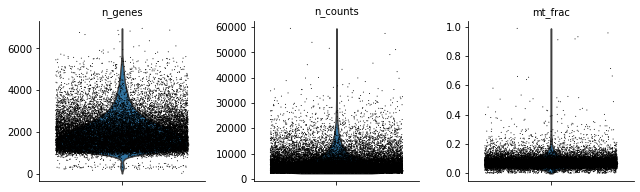

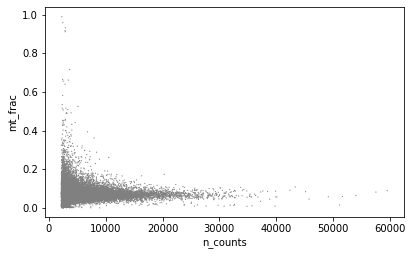

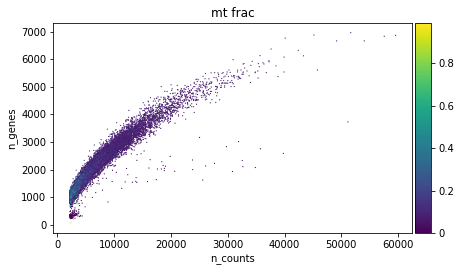

In [31]:
# Quality control - calculate QC covariates
adata.obs['n_counts'] = adata.X.sum(1)
adata.obs['log_counts'] = np.log(adata.obs['n_counts'])
adata.obs['n_genes'] = (adata.X > 0).sum(1)

adata.X = adata.X.toarray()
mt_gene_mask = [gene.startswith('MT-') for gene in adata.var_names]
adata.obs['mt_frac'] = adata.X[:, mt_gene_mask].sum(1)/adata.obs['n_counts']

# Quality control - plot QC metrics
sc.pl.violin(adata, ['n_genes', 'n_counts', 'mt_frac'],
             jitter=0.4, multi_panel=True)

sc.pl.scatter(adata, x='n_counts', y='mt_frac')
sc.pl.scatter(adata, x='n_counts', y='n_genes', color='mt_frac')

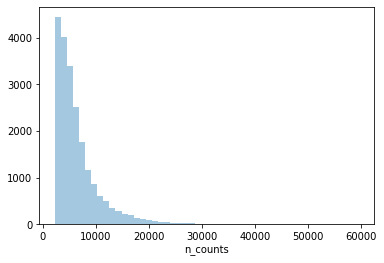

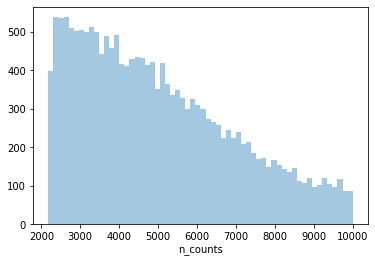

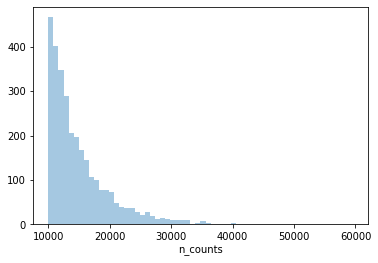

In [32]:
#Thresholding decision: counts
p3 = sb.distplot(adata.obs['n_counts'], kde=False)
plt.show()

p4 = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']<10000], kde=False, bins=60)
plt.show()

p5 = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']>10000], kde=False, bins=60)
plt.show()

In [33]:
# Filter cells according to identified QC thresholds:
print('Total number of cells: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, max_counts = 40000)
print('Number of cells after max count filter: {:d}'.format(adata.n_obs))

adata = adata[adata.obs['mt_frac'] < 0.5]
print('Number of cells after MT filter: {:d}'.format(adata.n_obs))

Total number of cells: 21038


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Number of cells after max count filter: 21027
Number of cells after MT filter: 21010


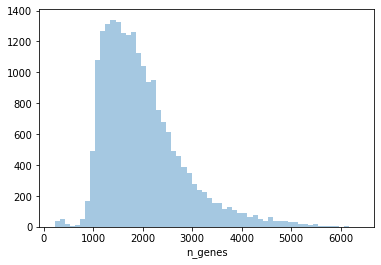

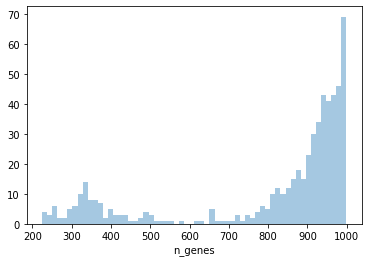

In [34]:
#Thresholding decision: genes
p6 = sb.distplot(adata.obs['n_genes'], kde=False, bins=60)
plt.show()

p7 = sb.distplot(adata.obs['n_genes'][adata.obs['n_genes'] < 1000], kde=False, bins=60)
plt.show()

In [35]:
# Filter cells according to identified QC thresholds:
print('Total number of cells: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, min_genes = 600)
print('Number of cells after min genes filter: {:d}'.format(adata.n_obs))

Total number of cells: 21010


Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Number of cells after min genes filter: 20903


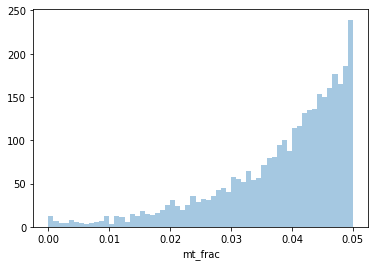

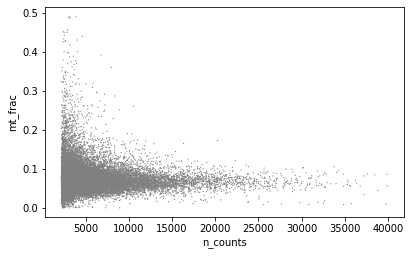

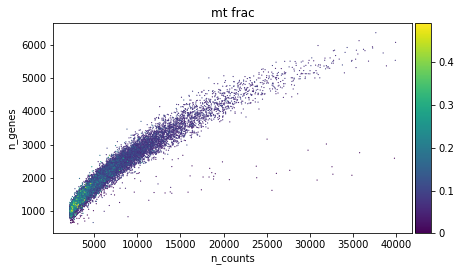

In [36]:
sb.distplot(adata.obs['mt_frac'][adata.obs['mt_frac'] < 0.05], kde=False, bins=60)
plt.show()
sc.pl.scatter(adata, x='n_counts', y='mt_frac')
sc.pl.scatter(adata, x='n_counts', y='n_genes', color='mt_frac')

In [37]:
# Thresholding on number of counts and percent_mito
print('Total number of cells: {:d}'.format(adata.n_obs))
adata = adata[(adata.obs['mt_frac'] > 0.01) | (adata.obs['n_counts'] > 40000)]

print('Number of cells after filter: {:d}'.format(adata.n_obs))

Total number of cells: 20903
Number of cells after filter: 20824


In [38]:
adata.obs['sample'] = '782328'
adata.var_names_make_unique()
adatas.append(adata)

Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [52]:
adata = sc.read('../data/petti/809653.matrix.mtx.gz').T
adata.obs_names = pd.read_csv('../data/petti/809653.barcodes.tsv.gz', delimiter='\t', header=None)[0].values
adata.var_names = pd.read_csv('../data/petti/809653.genes.tsv.gz', delimiter='\t', header=None)[1]
adata

Only considering the two last: ['.mtx', '.gz'].
Only considering the two last: ['.mtx', '.gz'].


AnnData object with n_obs × n_vars = 21731 × 33694

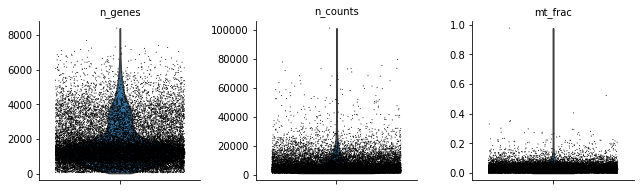

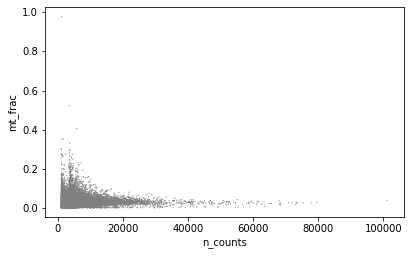

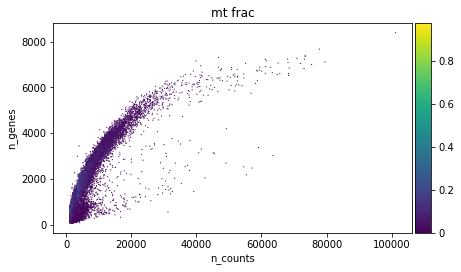

In [53]:
# Quality control - calculate QC covariates
adata.obs['n_counts'] = adata.X.sum(1)
adata.obs['log_counts'] = np.log(adata.obs['n_counts'])
adata.obs['n_genes'] = (adata.X > 0).sum(1)

adata.X = adata.X.toarray()
mt_gene_mask = [gene.startswith('MT-') for gene in adata.var_names]
adata.obs['mt_frac'] = adata.X[:, mt_gene_mask].sum(1)/adata.obs['n_counts']

# Quality control - plot QC metrics
sc.pl.violin(adata, ['n_genes', 'n_counts', 'mt_frac'],
             jitter=0.4, multi_panel=True)

sc.pl.scatter(adata, x='n_counts', y='mt_frac')
sc.pl.scatter(adata, x='n_counts', y='n_genes', color='mt_frac')

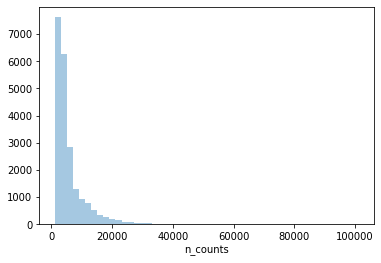

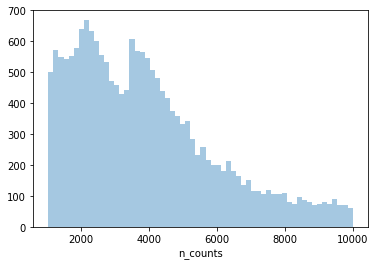

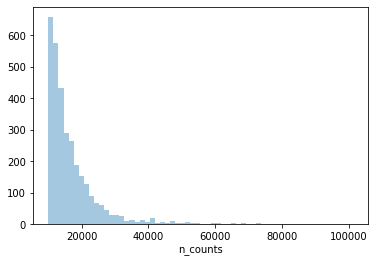

In [54]:
#Thresholding decision: counts
p3 = sb.distplot(adata.obs['n_counts'], kde=False)
plt.show()

p4 = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']<10000], kde=False, bins=60)
plt.show()

p5 = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']>10000], kde=False, bins=60)
plt.show()

In [55]:
# Filter cells according to identified QC thresholds:
print('Total number of cells: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, max_counts = 60000)
print('Number of cells after max count filter: {:d}'.format(adata.n_obs))

adata = adata[adata.obs['mt_frac'] < 0.4]
print('Number of cells after MT filter: {:d}'.format(adata.n_obs))

Total number of cells: 21731


Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Number of cells after max count filter: 21705
Number of cells after MT filter: 21702


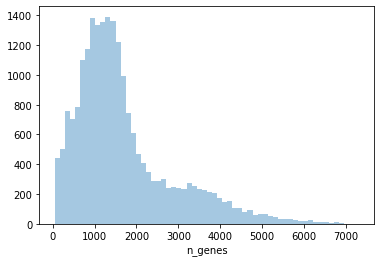

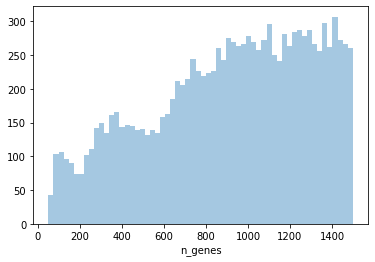

In [56]:
#Thresholding decision: genes
p6 = sb.distplot(adata.obs['n_genes'], kde=False, bins=60)
plt.show()

p7 = sb.distplot(adata.obs['n_genes'][adata.obs['n_genes'] < 1500], kde=False, bins=60)
plt.show()

In [57]:
# Filter cells according to identified QC thresholds:
print('Total number of cells: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, min_genes = 600)
print('Number of cells after min genes filter: {:d}'.format(adata.n_obs))

Total number of cells: 21702


Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Number of cells after min genes filter: 18914


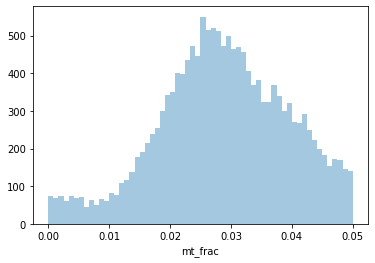

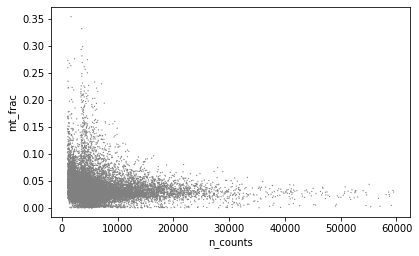

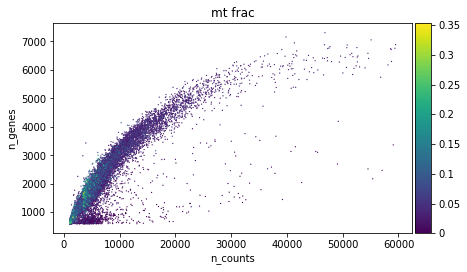

In [46]:
sb.distplot(adata.obs['mt_frac'][adata.obs['mt_frac'] < 0.05], kde=False, bins=60)
plt.show()
sc.pl.scatter(adata, x='n_counts', y='mt_frac')
sc.pl.scatter(adata, x='n_counts', y='n_genes', color='mt_frac')

In [47]:
# Thresholding on number of counts and percent_mito
print('Total number of cells: {:d}'.format(adata.n_obs))
adata = adata[(adata.obs['mt_frac'] > 0.01) | (adata.obs['n_counts'] > 20000)]

print('Number of cells after filter: {:d}'.format(adata.n_obs))

Total number of cells: 18914
Number of cells after filter: 18192


In [48]:
adata.obs['sample'] = '809653'
adata.var_names_make_unique()
adatas.append(adata)

Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [49]:
# merge all samples
adata_merge = adatas[0].concatenate(adatas[1:], batch_key='sample_ID')
adata_merge

AnnData object with n_obs × n_vars = 85141 × 33694
    obs: 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'sample', 'sample_ID'

In [50]:
adata_merge.X = sparse.csr_matrix(adata_merge.X).astype(dtype='float32')
adata_merge.layers['counts'] = adata_merge.X
sc.pp.normalize_per_cell(adata_merge, counts_per_cell_after=1e4)
sc.pp.log1p(adata_merge)
adata_merge

AnnData object with n_obs × n_vars = 85141 × 33694
    obs: 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'sample', 'sample_ID'
    uns: 'log1p'
    layers: 'counts'

In [51]:
adata_merge.write('../data/petti/petti_AML.h5ad')

... storing 'sample' as categorical
